In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
dataset = pd.read_csv('2017.csv') 

In [21]:
dataset.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.0+ KB


In [23]:
dataset.isnull().sum() #EDA

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

## 정규화

In [28]:
dataset = dataset.drop(['Country'], axis = 1)

KeyError: "['Country'] not found in axis"

In [29]:
dataset.head()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [30]:
scaler = preprocessing.StandardScaler()
scaler.fit(dataset)
X_scaled = scaler.transform(dataset)

C:\Users\gnkwo\Anaconda332bit\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gnkwo\Anaconda332bit\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
dataset.head()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


PCA

In [32]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components = 2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [47]:
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (155, 11)
축소된 데이터 형태: (155, 2)


In [37]:
X_pca

array([[-4.95624723e+00,  9.00728764e-01],
       [-4.98768673e+00,  1.23714076e+00],
       [-4.68738072e+00,  5.82287326e-01],
       [-4.94590733e+00,  7.93235011e-01],
       [-4.82117938e+00,  5.43813657e-01],
       [-4.48762947e+00,  1.14924807e+00],
       [-4.48793694e+00,  1.18602729e+00],
       [-4.63860319e+00,  2.07919637e+00],
       [-4.57347201e+00,  1.52145156e+00],
       [-4.47385314e+00,  1.53780469e+00],
       [-3.58356249e+00, -1.31096358e+00],
       [-3.44108144e+00, -1.32941071e+00],
       [-3.81693667e+00,  3.38764100e-01],
       [-3.54818081e+00,  4.85920415e-02],
       [-4.00875283e+00,  1.55781687e+00],
       [-3.79670007e+00,  8.13240440e-01],
       [-3.61942596e+00,  7.18989345e-02],
       [-3.93176095e+00,  1.21521836e+00],
       [-3.41031600e+00,  1.66651893e+00],
       [-2.58220007e+00, -9.91432731e-01],
       [-3.33403863e+00,  1.62386487e+00],
       [-2.45785914e+00, -1.63492476e+00],
       [-2.62839319e+00, -1.94028631e+00],
       [-2.

In [41]:
import mglearn

In [49]:
from sklearn.cluster import KMeans
score = []

## Use elbow method to find optimal k

In [51]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
    kmeans.fit(X_pca)
    score.append(kmeans.inertia_)

In [53]:
score

[1260.0981351185792,
 542.446446450384,
 335.16879145082714,
 248.32126998825157,
 202.04772371895254,
 167.49101310518336,
 141.73947885709242,
 122.33340737470257,
 111.14607259242914,
 96.23668240846779]

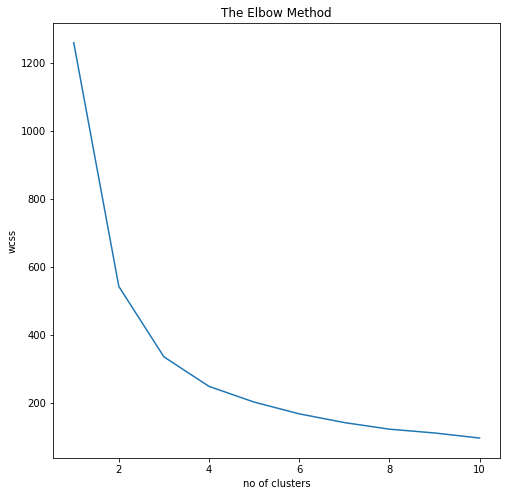

In [54]:
plt.figure(figsize=(8, 8))
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

## ideal k = 4

In [56]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(X_pca)

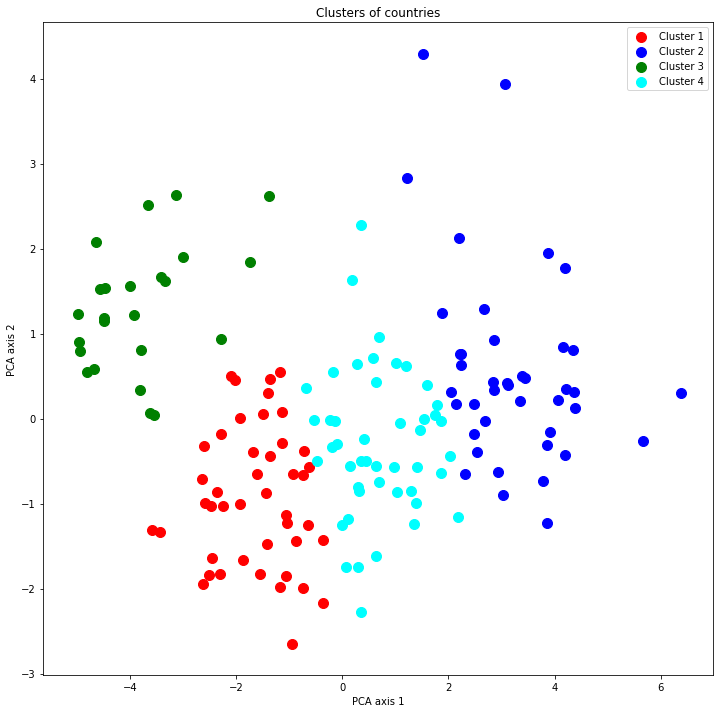

In [58]:
plt.figure(figsize=(12, 12))
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_pca[y_kmeans == 3, 0], X_pca[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of countries')
plt.xlabel('PCA axis 1')
plt.ylabel('PCA axis 2')
plt.legend()
plt.show()

## 여기서 뭔가 이상한걸 느낌.. PCA하면 원하는 axis 2개를 못고르는구나.... ㅠ 해서 다시 풀었어요...

In [61]:
dataset.head()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [63]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(dataset)
scaled_df = pd.DataFrame(scaled_df)

C:\Users\gnkwo\Anaconda332bit\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [64]:
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,1.000000,0.994201,1.000000,0.864065,0.952160,0.839045,0.965323,0.431957,0.680505,0.693215
1,0.006494,0.996903,0.991528,0.996514,0.792394,0.963086,0.834726,0.951019,0.423924,0.863156,0.706605
2,0.012987,0.993187,1.000000,0.981126,0.791458,1.000000,0.877892,0.952775,0.567420,0.330657,0.709893
3,0.019481,0.991123,0.987333,0.989245,0.836545,0.941845,0.903779,0.942001,0.346686,0.790440,0.693102
4,0.025974,0.985962,0.980138,0.986065,0.771648,0.956334,0.852200,0.938780,0.292913,0.824047,0.749120


In [65]:
scaled_df = pd.DataFrame(scaled_df, columns=[1, 7])
## 1 = happiness
## 2 = freedom

In [82]:
scaled_df

,1,7
0,1.000000,0.965323
1,0.996903,0.951019
2,0.993187,0.952775
3,0.991123,0.942001
4,0.985962,0.938780
5,0.966969,0.889306
6,0.954377,0.928374
7,0.953964,0.932873
8,0.947770,0.931144
9,0.947770,0.913952


In [85]:
X2 = scaled_df.iloc[:, [0,1]].values

In [90]:
X2

array([[1.        , 0.96532302],
       [0.99690331, 0.9510186 ],
       [0.99318745, 0.95277464],
       [0.99112299, 0.94200051],
       [0.98596195, 0.93878027],
       [0.96696938, 0.889306  ],
       [0.95437651, 0.92837395],
       [0.95396366, 0.93287258],
       [0.94777039, 0.93114371],
       [0.94777039, 0.91395154],
       [0.93311306, 0.61677088],
       [0.90545001, 0.88132598],
       [0.89037983, 0.86254059],
       [0.88769609, 0.76831227],
       [0.88439308, 0.87065933],
       [0.87902561, 0.85455758],
       [0.86663906, 0.82001036],
       [0.86085874, 0.90638679],
       [0.8300991 , 0.77203353],
       [0.81729971, 0.5725728 ],
       [0.81647391, 0.92418763],
       [0.81379027, 0.66457218],
       [0.8084228 , 0.74583695],
       [0.80635834, 0.75126503],
       [0.8020231 , 0.6270123 ],
       [0.80078445, 0.8353083 ],
       [0.79149459, 0.89444474],
       [0.77642441, 0.88020271],
       [0.77642441, 0.80715791],
       [0.77601156, 0.83559127],
       [0.

In [91]:
score2=[]

In [92]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
    kmeans.fit(X2)
    score2.append(kmeans.inertia_)

In [93]:
score2

[16.39538553949186,
 7.892763506598522,
 5.283014877307061,
 3.932008019117891,
 2.8227790529580528,
 2.3075952021910213,
 1.985011624404961,
 1.750783749869219,
 1.491380562688843,
 1.355120531129574]

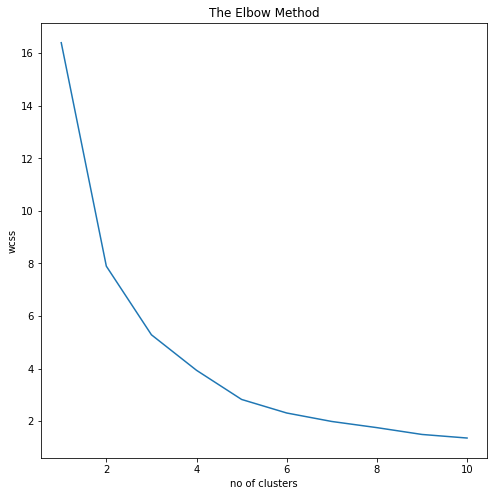

In [94]:
plt.figure(figsize=(8, 8))
plt.plot(range(1,11), score2)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

## ideal k = 5

In [95]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(scaled_df)

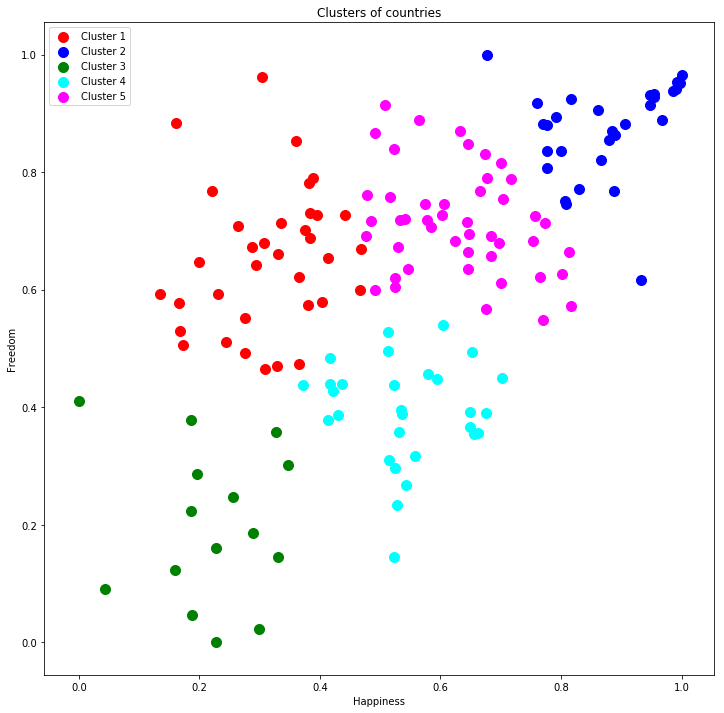

In [98]:
plt.figure(figsize=(12, 12))
plt.scatter(X2[y_kmeans == 0, 0], X2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X2[y_kmeans == 1, 0], X2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X2[y_kmeans == 2, 0], X2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X2[y_kmeans == 3, 0], X2[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X2[y_kmeans == 4, 0], X2[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of countries')
plt.xlabel('Happiness')
plt.ylabel('Freedom')
plt.legend()
plt.show()

## 결과해석 - 행복지수와 자유도를 기준으로 구분한 결과 국가는 5가지 군집으로 클러스터링이 될 수 있다. 그리고 그 관계에서 행복지수와 자유도가 어느정도의 상관관계를 가지고있음도 확인할 수 있다.